# Implementing a Hough Transform on Edge Detected Image

In [5]:
"""
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                                             min_line_length, max_line_gap)

masked_edges is the output from Canny
the output from HoughLinesP will be lines, 
which will simply be an array containing the endpoints (x1, y1, x2, y2) of all line segments
rho and theta are the distance and angular resolution of grid in Hough space. 
in Hough space, we have a grid laid out along the (Θ, ρ) axis. 
You need to specify rho in units of pixels and theta in units of radians.
"""

'\nlines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),\n                                             min_line_length, max_line_gap)\n\nmasked_edges is the output from Canny\nthe output from HoughLinesP will be lines, \nwhich will simply be an array containing the endpoints (x1, y1, x2, y2) of all line segments\nrho and theta are the distance and angular resolution of grid in Hough space. \nin Hough space, we have a grid laid out along the (Θ, ρ) axis. \nYou need to specify rho in units of pixels and theta in units of radians.\n'

In [8]:
# Do relevant imports
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline
# Read in and grayscale the image
image = mpimg.imread('exit-ramp.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

# Define a kernel size and apply Gaussian smoothing
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

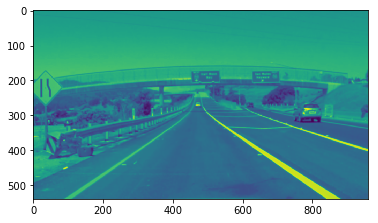

In [10]:
plt.imshow(blur_gray)

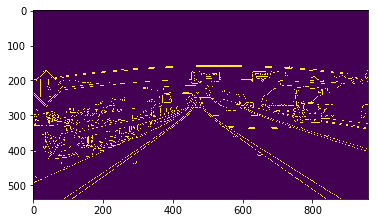

In [12]:
# Define our parameters for Canny and apply
low_threshold = 50
high_threshold = 150
masked_edges = cv2.Canny(blur_gray, low_threshold, high_threshold)
plt.imshow(masked_edges)

In [103]:
# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 1
theta = np.pi/180
threshold = 15
min_line_length = 40
max_line_gap = 20

# Run Hough on edge detected image
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)

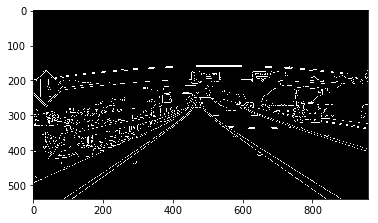

In [104]:
line_image = np.copy(image)*0 #creating a blank to draw lines on

# Iterate over the output "lines" and draw lines on the blank
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

# Create a "color" binary image to combine with line image
# Stack arrays in sequence depth wise (along third axis).
color_edges = np.dstack((masked_edges, masked_edges, masked_edges)) 
plt.imshow(color_edges)

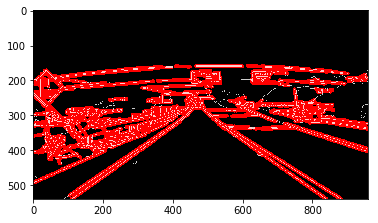

In [105]:
# Draw the lines on the edge image
# Image Blending
combo = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) 
plt.imshow(combo)

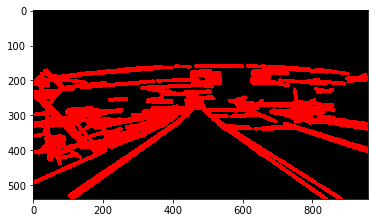

In [106]:
plt.imshow(line_image)

In [97]:
ysize = line_image.shape[0]
xsize = line_image.shape[1]

left_top = [400, 320]
right_top = [500, 320]
left_bottom = [0, ysize-1]
right_bottom = [900, ysize-1]

vertices = np.array([[(0,imshape[0]),(450, 290), (490, 290), (imshape[1],imshape[0])]], dtype=np.int32)

# Perform a linear fit (y=Ax+B) to each of the three sides of the triangle
# np.polyfit returns the coefficients [A, B] of the fit
fit_left = np.polyfit((left_bottom[0], left_top[0]), (left_bottom[1], left_top[1]), 1)
fit_right = np.polyfit((right_bottom[0], right_top[0]), (right_bottom[1], right_top[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)
fit_top = np.polyfit((left_top[0], right_top[0]), (left_top[1], right_top[1]), 1)

# Define color selection criteria
# MODIFY THESE VARIABLES TO MAKE YOUR COLOR SELECTION
red_threshold = 255
green_threshold = 0
blue_threshold = 0
rgb_threshold = [red_threshold, green_threshold, blue_threshold]

In [98]:
print (xsize,ysize)

960 540


In [102]:
line_image_select = np.copy(line_image)

# Mask pixels below the threshold
color_thresholds = (line_image_select[:,:,0] == rgb_threshold[0]) and \
                    (line_image_select[:,:,1] == rgb_threshold[1]) and \
                    (line_image_select[:,:,2] == rgb_threshold[2])

# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1])) & \
                    (YY > (XX*fit_top[0] + fit_top[1]))
                    
# # Mask color and region selection
thres = 200
# color_select[color_thresholds | ~region_thresholds] = [thres, thres, thres]
# Color pixels red where both color and region selections met
line_image_select[color_thresholds | ~region_thresholds] = [0, 0, 0]#[0, 0, 0]

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

(540, 960)


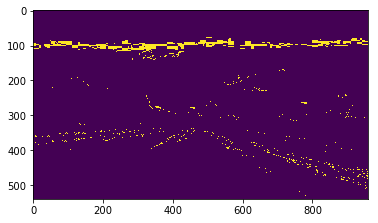

In [100]:
print(color_thresholds.shape)
plt.imshow(color_thresholds)

(540, 960)


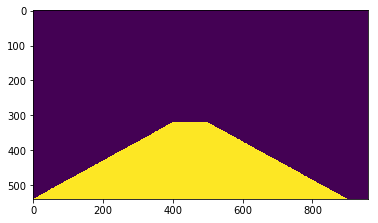

In [96]:
print(region_thresholds.shape)
plt.imshow(region_thresholds)

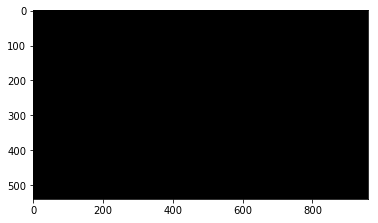

In [83]:
plt.imshow(line_image_select)

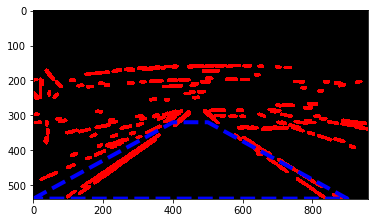

In [57]:
x = [left_bottom[0], left_top[0], right_top[0],right_bottom[0], left_bottom[0]]
y = [left_bottom[1], left_top[1], right_top[1],right_bottom[1], left_bottom[1]]
plt.plot(x, y, 'b--', lw=4)
plt.imshow(line_image_select)